In [2]:
import pandas as pd
import pmdarima as pm
from sklearn.metrics import mean_absolute_percentage_error
from prophet import Prophet
import matplotlib.pyplot as plt

In [3]:
%store -r date_list
%store -r cpi_list
%store -r ppi_list
%store -r unemployed_ratio_list
%store -r update_sp500

In [4]:
prophet_case_sp500 = pd.DataFrame()
prophet_case_sp500['ds'] = date_list
prophet_case_sp500['cpi'] = cpi_list
prophet_case_sp500['ppi'] = ppi_list
prophet_case_sp500['unemployment_ratio'] = unemployed_ratio_list
prophet_case_sp500_update = pd.concat([prophet_case_sp500, update_sp500], axis=1).dropna()
prophet_case_sp500_update['ds'] = pd.to_datetime(prophet_case_sp500_update['ds'])
prophet_case_sp500_update.rename(columns={"Price": "y"}, inplace = True)

In [5]:
prophet_case_sp500_update

,ds,cpi,ppi,unemployment_ratio,y
0,2000-01-01,168.800,130.800,4.0,1394.46
1,2000-02-01,169.800,132.200,4.1,1366.42
2,2000-03-01,171.200,132.900,4.0,1498.58
3,2000-04-01,171.300,132.600,3.8,1452.43
4,2000-05-01,171.500,133.100,4.0,1420.60
...,...,...,...,...,...
266,2022-03-01,287.504,245.404,3.6,4530.41
267,2022-04-01,289.109,249.827,3.6,4131.93
268,2022-05-01,292.296,256.579,3.6,4132.15
269,2022-06-01,296.311,262.828,3.6,3785.38


In [6]:
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-15', 'lower_window': 0, 'ds_upper': '2020-03-22'},
])
for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days

In [7]:
train=prophet_case_sp500_update[(prophet_case_sp500_update['ds'] <= '2015-08-31')]
test=prophet_case_sp500_update[(prophet_case_sp500_update['ds'] > '2015-08-31')]

m2_without_variables = Prophet(mcmc_samples=600, holidays=lockdowns)

train.info()
m2_without_variables.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 187
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ds                  188 non-null    datetime64[ns]
 1   cpi                 188 non-null    float64       
 2   ppi                 188 non-null    float64       
 3   unemployment_ratio  188 non-null    float64       
 4   y                   188 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 8.8 KB


0.0835842316536356

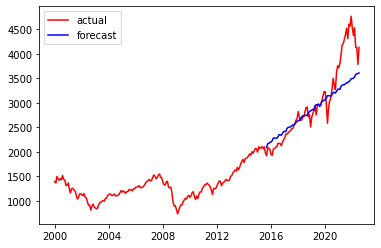

In [8]:
forecase3 = m2_without_variables.predict(test)
forecase3 = forecase3[['ds', 'yhat']]
final_df_3 = pd.concat((forecase3['yhat'], test.reset_index()), axis=1)
plt.figure()
plt.plot(prophet_case_sp500_update['ds'], prophet_case_sp500_update['y'], color='red', label='actual')
plt.plot(final_df_3['ds'], final_df_3['yhat'], color='blue', label='forecast')
plt.legend()
mean_absolute_percentage_error(final_df_3['y'], final_df_3['yhat'])

In [9]:
data_prophet_no_variable_holiday = final_df_3
%store data_prophet_no_variable_holiday

Stored 'data_prophet_no_variable_holiday' (DataFrame)
